<a href="https://colab.research.google.com/github/m607stars/Linear-Regression-/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression** 



In [0]:
#We import the necessary libraries. Numpy and pandas for basic functions like vectors and reading data. 
import numpy as np                                               
import pandas as pd
import matplotlib.pyplot as plt                            #Matplotlib is used for plotting grpahs, histograms, etc.

from sklearn.linear_model import LinearRegression          #sklearn contians all pre-defined models, like linear regression, logistic regresion,etc.
from sklearn.metrics import r2_score                          


In [0]:
#Mount the Google drive which contains our dataset

from google.colab import drive          
drive.mount('/content/drive')

In [0]:
#read our dataset into a dataframe labelled data with the help of pandas. 
#We copy paste the path where our dataset was present in the drive
#Since our data is in a csv file we use pd.read_csv

data = pd.read_csv('/content/drive/My Drive/Height_weight Dataset.csv')
data                     #Print all the data

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


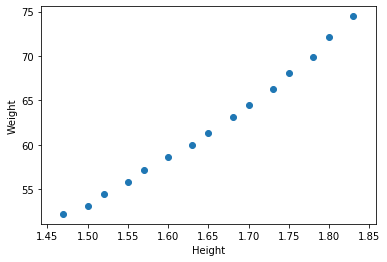

In [0]:
#Plot the graph using matplotlib 

plt.scatter(data['Height'],data['Weight'])        #plotting points on a graph 
plt.xlabel("Height")                              #Labelling the x and y axis
plt.ylabel("Weight")
plt.show()         

In [0]:
#We reshape the vector as when we read the data from csv we read it as a vector. 
#We reshape the vector so that we get a vector of 1 dimension only 

X = data['Height'].values.reshape(-1,1)
Y = data['Weight'].values.reshape(-1,1)

The linear regression lgorithm is as follow:

We **hypothesize y = mx + c** where m and c are randomly initialized. We generally take the **learning rate i.e. alpha as 0.01**. Many sophisticated algorithms change this learning rate too along with increasing number of epochs for the less training time. Epoch is one loop of all our data points

Next we calculate the loss. We use the **mean squared Loss function** which is given by **L = (y - yP )^2/2 = (y-mx-c)^2/2** where y is the acual value in the dataset and yP is the predicted value according to our hypothesis

Now we calculate the derivative of the loss functuion wrt to the parameters m and c. m is the weight of the feature and b is the bias taht we add. Here since we are dealing with only one feature we have only one weight but for multiple features we will have many weights assigned to each of them and sometimes assigned to a combination of the featuires too. 

 **dL/dm = dL/dy * dy/dw = -(y-yP)*x**

**dL/dc = dL/dy * dy/dc = -(y-yP)**

Next we perform gradient descent. Gradient descent is basically updating the values of our weights and biases (i.e. m and c). This  is done by using the calculated derivatives. We introduce the learning rate (i.e. alpha) here and then update the values of m and c according to the below formula 

**m(new) = m - (alpha)*(dL/dm)**

**c(new) = c - (alpha)*(dL/dc)**


Now using these updated values we calculate the y(predicted) for other instaces and the process continues. When all the instances ahve been gone through once, one epoch has been completed. Similarly **we run many epochs to get our required accuracy**.

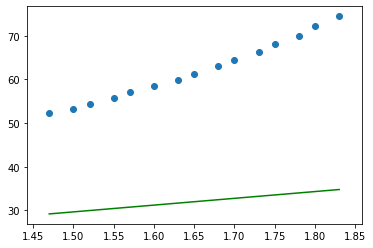

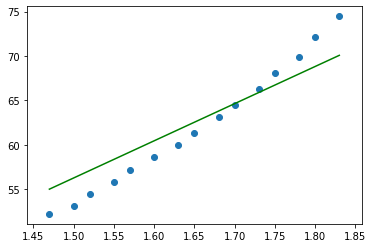

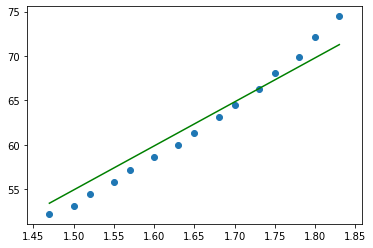

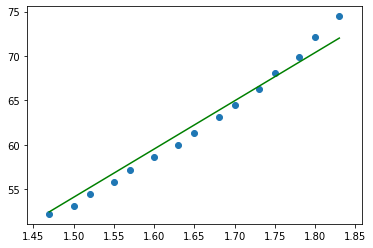

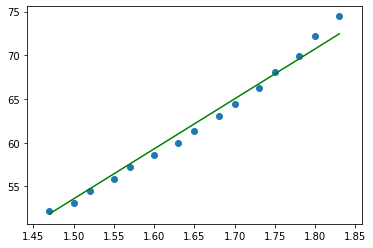

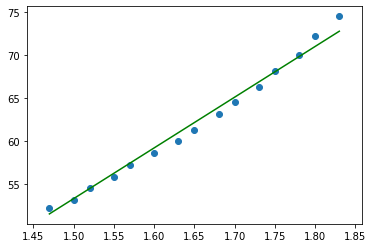

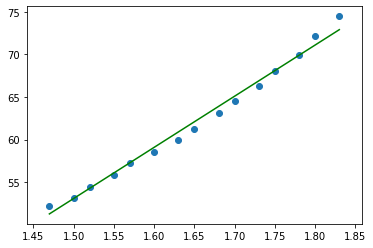

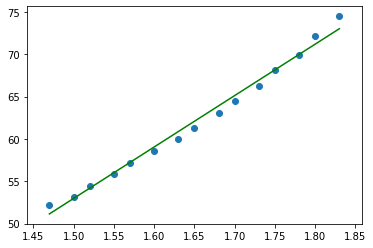

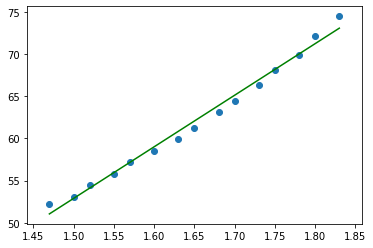

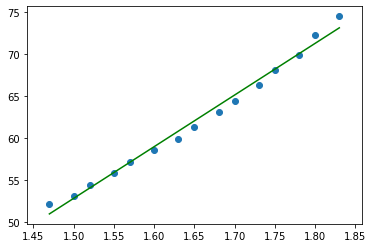

[61.50511789]
[-39.43242206]


In [0]:
#initialize m and c randomly  
m=5
c=0
alpha=0.01            
epochs = 10000

def Linear_Regression(x,y,m,c,alpha):
    y_p = m*x + c                         #Our hypothesis for the regresssion 
    dL_dm = -(y - y_p)*x                   #Calculate the Loss wrt m i.e. dL/dm
    dL_dc = -(y - y_p)                     #Calculate the loss wrt c i.e. dL/dc
    m = m - alpha*(dL_dm)                 #Update m and c 
    c = c - alpha*(dL_dc)           
    return m,c                              

for i in range(epochs):                                    #First loop for the number of epochs 
  for j in range(15):                                      #Second loop for traversing through all the instantces
    m, c = Linear_Regression(X[j],Y[j],m,c,alpha)          #Calling linear regression function that we defined above
    #L=((Y[j]-m*X[j]-c)**2)/2
  if(i%1000==0):
    plt.scatter(data['Height'],data['Weight'])              #plotting the data points
    x_plot = data['Height']
    y_plot = m*(x_plot) + c                                 #predicting y from current m and c values
    plt.plot(x_plot,y_plot,color='green')                   #plotting regression line
    plt.show()

print(m)
print(c)

#Observation : If the m and c values are farther away from the actual values then we need more epochs to train
#Eg. if m=5 and c=0 we need 500000 epochs to train, for m=50 c=0 100000 are sufficient

In [0]:
reg = LinearRegression()         #Used the scikit Learn library containing the inbulit linear regression feature
reg.fit(X,Y)                     #Applied the linear regression on X i.e. height and Y i.e. weight.  

print(reg.coef_[0][0])
print(reg.intercept_[0])          #We print the m and the c values of the line that we obtain from linear regression


61.272186542110624
-39.06195591884392


In [0]:
#We convert the numpy ndarray datatype into our float datatype for the values of M and C calculated by library 
M = np.float64(reg.coef_[0][0])             
M_library = M.item()
C = np.float64(reg.intercept_[0])
C_library = C.item()

p = float(input("Enter your height "))            #Take input from user about his height
q_library = (M_library)* p + C_library            #Calculate estimated weight 
q = m*p + c
print("Your weight might be around ")
print(q_library)
print(q)

Enter your height 1.8
71.2279798569552
[71.27679014]
